For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import export_text
from sklearn.metrics import roc_curve, roc_auc_score
from logistic_regression import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [4]:
%load_ext autoreload
%autoreload 2

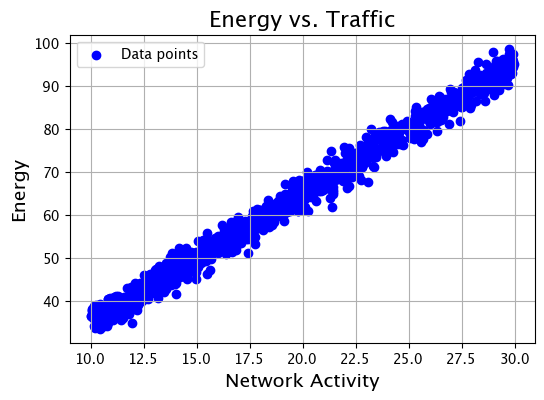

In [5]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [6]:
lr = LinearRegression()
X = data['Net_Activity'].values.reshape(-1, 1)
y = data['Energy']

# Split data i 80% trening og 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

mse = np.mean((predictions - y_test) ** 2)
print(f'MSE: {mse:.4f}')
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f'RMSE: {rmse:.4f}')

MSE: 5.6748
RMSE: 2.3822


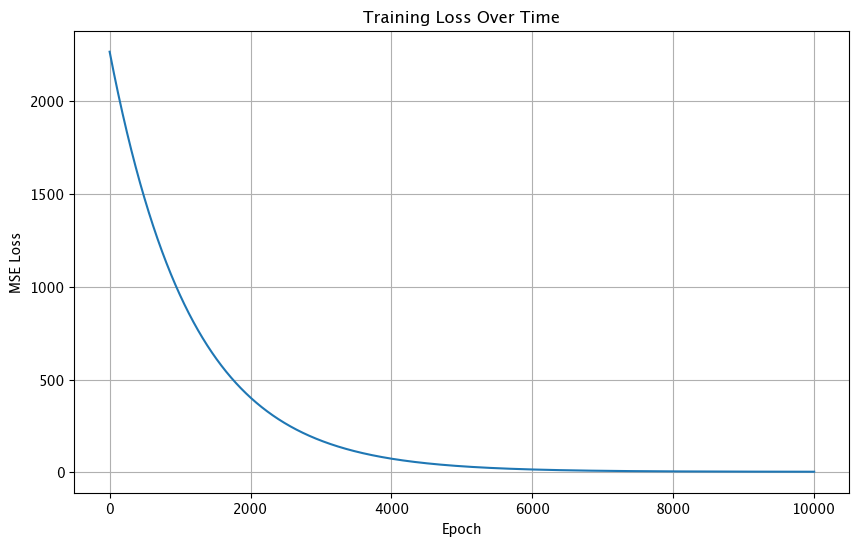

Initial loss: 2267.0520
Final loss: 3.2880
Loss reduction: 99.85%


In [7]:
plt.figure(figsize=(10, 6))
plt.plot(lr.losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

print(f'Initial loss: {lr.losses[0]:.4f}')
print(f'Final loss: {lr.losses[-1]:.4f}')
print(f'Loss reduction: {((lr.losses[0] - lr.losses[-1]) / lr.losses[0] * 100):.2f}%')

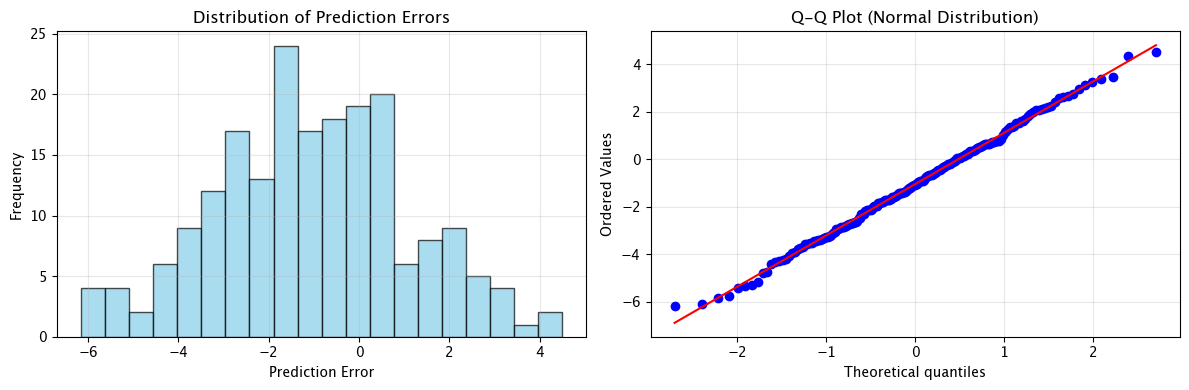

Error statistics:
Mean error: -1.0413
Std error: 2.1425
Error range: [-6.1575, 4.5013]


In [ ]:
errors = predictions - y_test

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(errors, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Error statistics:')
print(f'Mean error: {np.mean(errors):.4f}')
print(f'Std error: {np.std(errors):.4f}')
print(f'Error range: [{np.min(errors):.4f}, {np.max(errors):.4f}]')

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [12]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [13]:
X_train = train.iloc[:, 0:2].values
y_train = train.iloc[:, 2].values

X_test = test.iloc[:, 0:2].values
y_test = test.iloc[:, 2].values


In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=6, 
                                  min_samples_leaf=2, 
                                  min_samples_split=2,
                                  random_state=50, 
                                  )

clf.fit(X_train, y_train)
clfPred = clf.predict(X_test)

print(f'Accuracy: {np.mean(sum((y_test, clfPred)))}')

Accuracy: 0.946


In [16]:
# Featuer engineering
X_train_eng = np.column_stack([
    X_train,
    X_train[:, 0]**2,
    X_train[:, 1]**2,
    X_train[:, 0] * X_train[:, 1]
])

X_test_eng = np.column_stack([
    X_test,  
    X_test[:, 0] ** 2,  
    X_test[:, 1] ** 2,  
    X_test[:, 0] * X_test[:, 1],  
])

In [17]:
lr = LogisticRegression(learning_rate=0.001, epochs=10000)
lr.fit(X_train_eng, y_train)
predictions = lr.predict(X_test_eng)
accuracy = np.mean(predictions == y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.40%


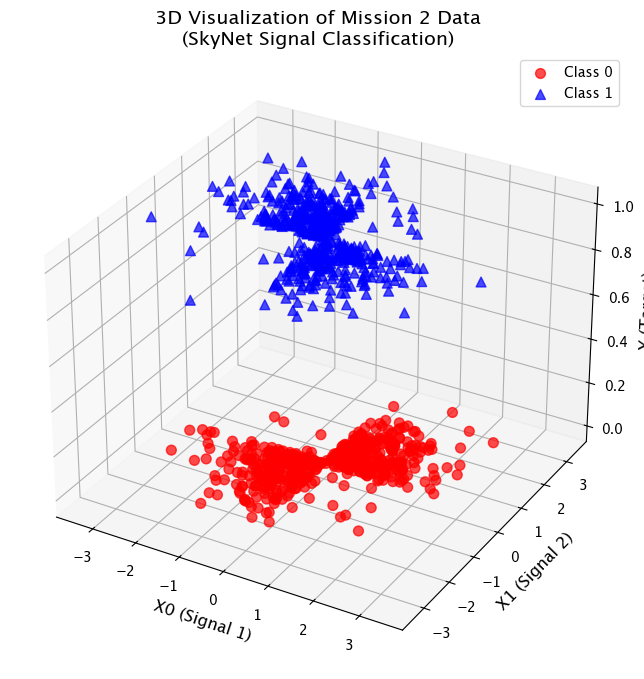

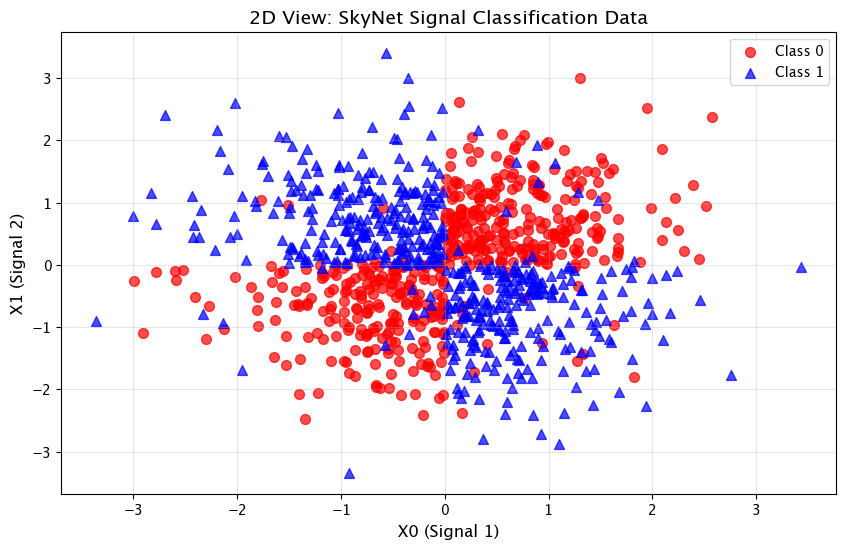

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Filtrer data basert på target klasse
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]

# Plot begge klasser med forskjellige farger
ax.scatter(class_0['x0'], class_0['x1'], class_0['y'], 
          c='red', marker='o', s=50, alpha=0.7, label='Class 0')
ax.scatter(class_1['x0'], class_1['x1'], class_1['y'], 
          c='blue', marker='^', s=50, alpha=0.7, label='Class 1')

ax.set_xlabel('X0 (Signal 1)', fontsize=12)
ax.set_ylabel('X1 (Signal 2)', fontsize=12)
ax.set_zlabel('Y (Target)', fontsize=12)
ax.set_title('3D Visualization of Mission 2 Data\n(SkyNet Signal Classification)', fontsize=14)
ax.legend()

# Legg til en 2D-visning også for bedre forståelse
plt.figure(figsize=(10, 6))
plt.scatter(class_0['x0'], class_0['x1'], c='red', marker='o', s=50, alpha=0.7, label='Class 0')
plt.scatter(class_1['x0'], class_1['x1'], c='blue', marker='^', s=50, alpha=0.7, label='Class 1')
plt.xlabel('X0 (Signal 1)', fontsize=12)
plt.ylabel('X1 (Signal 2)', fontsize=12)
plt.title('2D View: SkyNet Signal Classification Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

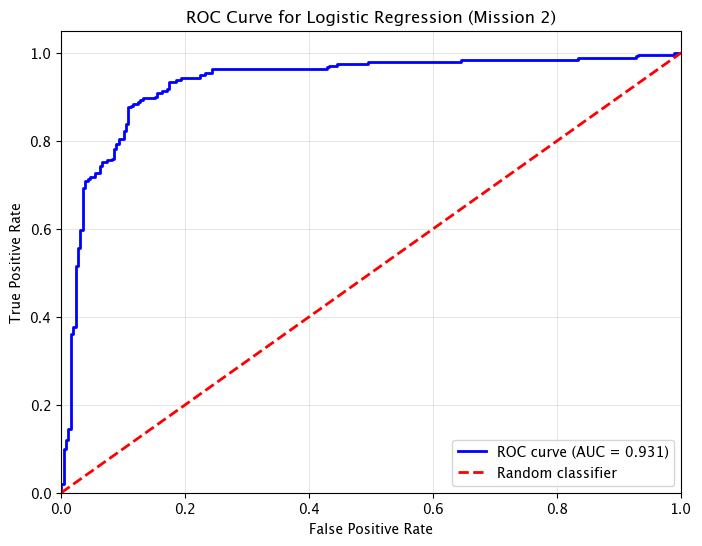

ROC AUC Score: 0.931


In [ ]:
z = X_test_eng @ lr.weights + lr.bias
y_pred_proba = 1 / (1 + np.exp(-z))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Mission 2)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"ROC AUC Score: {auc_score:.3f}")

In [478]:
regressor = tree.DecisionTreeRegressor().fit(X_train_eng, y_train)
y_pred = regressor.predict(X_test_eng)
accuracy = np.mean(y_test == y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.40%


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [479]:
def accuracy(trueValues, predictions):
    return np.mean(trueValues == predictions)

In [480]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train['data_stream_3'] = (train['data_stream_3'] * 1000 + 1) % 2
test['data_stream_3'] = (test['data_stream_3'] * 1000 + 1) % 2

In [481]:
X_train = train.iloc[:, 0:11].values
y_train = train.iloc[:, 11].values

X_test = test.iloc[:, 0:11].values
y_test = test.iloc[:, 11].values

In [482]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_test == y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 73.85%


In [483]:
a = (test["target"] == 1).sum()
b = (test["target"] == 0).sum()
n = len(test)
print(a)
print(b)
print(a/n)
print(b/n)

386
1614
0.193
0.807


In [484]:
param_grid = {
    'max_depth': [1, 2, 6, 10, 25, None],
    'min_samples_split': [2, 6, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

clf = tree.DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=1, verbose=1)
gridSearch.fit(X_train, y_train)
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_
print(f"Best parameters found: {bestParams}")
print(gridSearch.cv_results_)
best_model = gridSearch.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.2f}")
print(f"Best ROC-auc Score: {bestScore}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}
{'mean_fit_time': array([0.00703716, 0.00606828, 0.0059885 , 0.00573921, 0.00559435,
       0.00573745, 0.00607524, 0.00576544, 0.00561037, 0.00607548,
       0.00585337, 0.0057519 , 0.0058219 , 0.00580535, 0.00576196,
       0.00598159, 0.01117368, 0.01086993, 0.01066794, 0.01082501,
       0.0106204 , 0.01040306, 0.01062026, 0.01057429, 0.01077142,
       0.01055417, 0.0106998 , 0.01067166, 0.01389184, 0.01063647,
       0.01065502, 0.0108202 , 0.02836504, 0.02849851, 0.02826276,
       0.02840991, 0.02840252, 0.02821703, 0.02827115, 0.0286365 ,
       0.02819905, 0.02999139, 0.02796559, 0.02789364, 0.02737803,
       0.02771368, 0.02754865, 0.02784762, 0.04263377, 0.04237299,
       0.04285135, 0.04220982, 0.04148445, 0.04131866, 0.04155841,
       0.04094663, 0.04031048, 0.04047823, 0.04016175, 0.04022198,
     

In [485]:
clf = tree.DecisionTreeClassifier(criterion='gini', 
                                  max_depth=6, 
                                  min_samples_leaf=2, 
                                  min_samples_split=2,
                                  random_state=42, 
                                  )

clf.fit(X_train, y_train)
clfPred = clf.predict(X_test)


prob_predictions = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)
print(f'ROC AUC Score: {auc}')

ROC AUC Score: 0.72


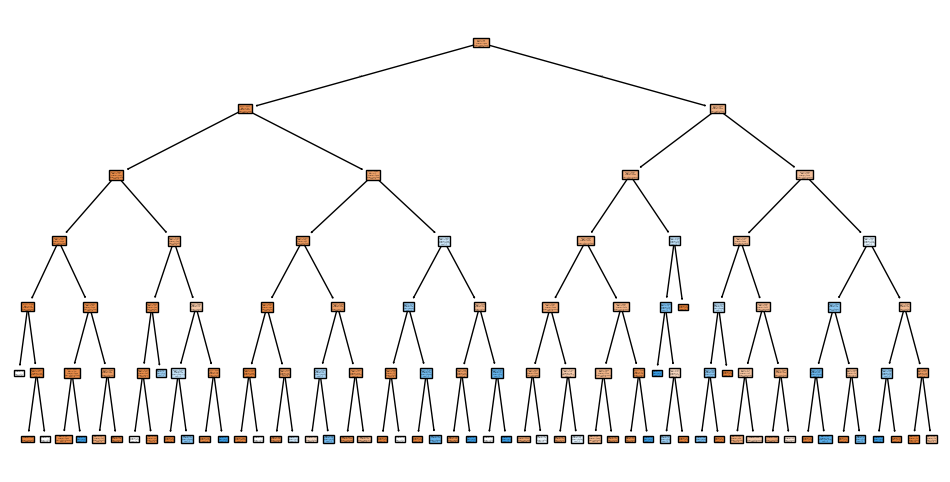

|--- feature_3 <= 0.50
|   |--- feature_0 <= 0.48
|   |   |--- feature_7 <= 1.22
|   |   |   |--- feature_6 <= -0.96
|   |   |   |   |--- feature_8 <= -2.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  -2.83
|   |   |   |   |   |--- feature_10 <= 2.66
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  2.66
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  -0.96
|   |   |   |   |--- feature_7 <= 0.71
|   |   |   |   |   |--- feature_4 <= 2.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  2.79
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.71
|   |   |   |   |   |--- feature_6 <= 0.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.42
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_7 >  1.22
|   |   |   |--- feature_0 <= -1.01
|   |   |   |   |--- feature_2 <= 1.73
|   |   |   |   |   |--- feature_5 <= -1.54
|   |   |   |   |

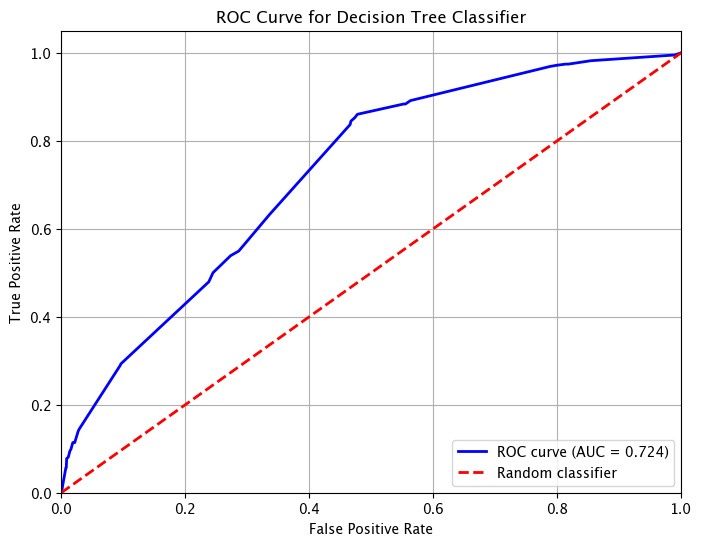

ROC AUC Score: 0.724


In [486]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,6))
tree.plot_tree(clf, class_names=["0","1"], filled=True)
plt.show()

print(export_text(clf, class_names=["0","1"]))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {auc_score:.3f}")

Random Forest Accuracy: 0.9220
Random Forest ROC AUC: 0.9477

Comparison:
Decision Tree AUC: 0.72
Random Forest AUC: 0.9477
Improvement: 0.2277


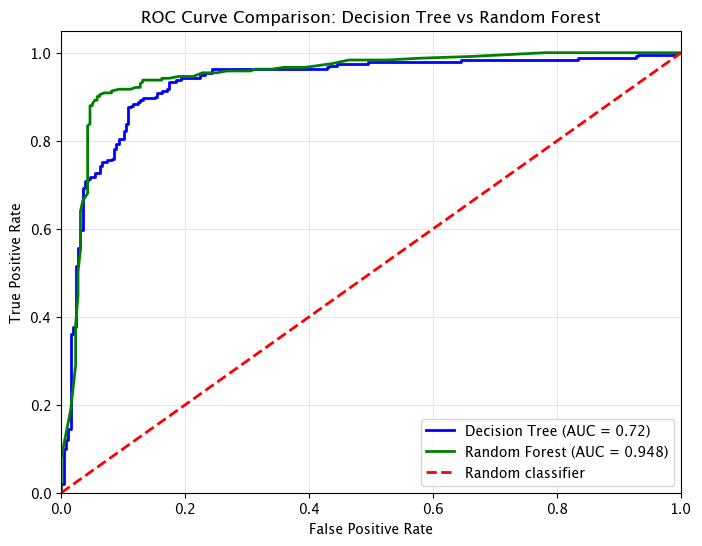

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'Random Forest ROC AUC: {rf_auc:.4f}')

# Compare with Decision Tree results
print(f'\nComparison:')
print(f'Decision Tree AUC: 0.72')
print(f'Random Forest AUC: {rf_auc:.4f}')
print(f'Improvement: {rf_auc - 0.72:.4f}')

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree (AUC = 0.72)')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Decision Tree vs Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [24]:
def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [25]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

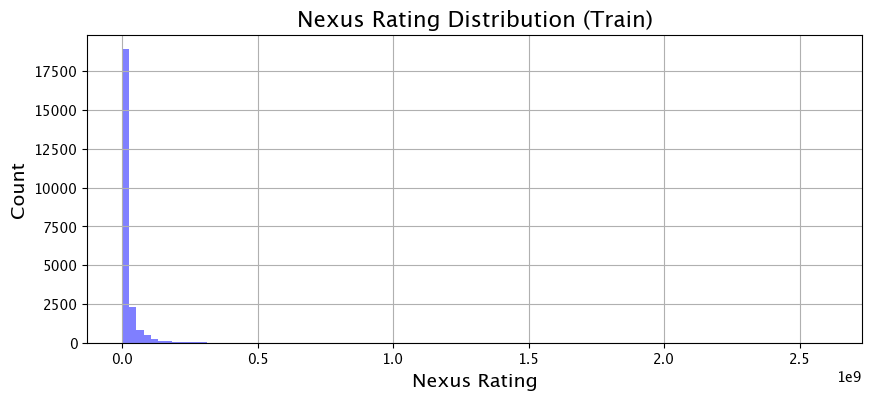

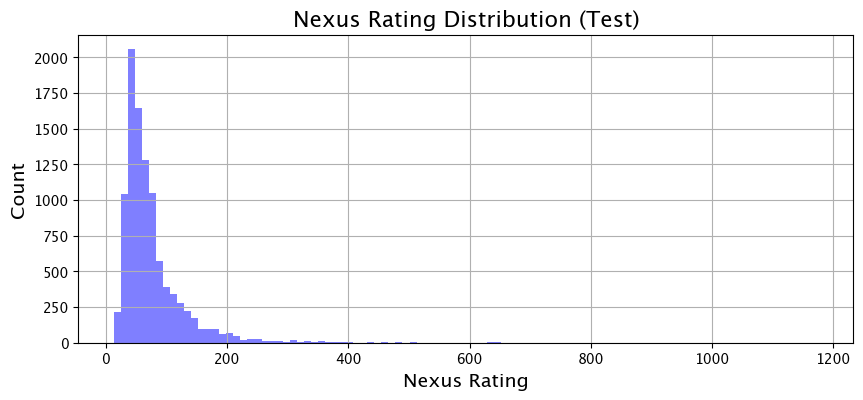

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [27]:
nexusRating = test['grid_connections']
ownershipType = test['ownership_type']

test = test.shift(1, axis=1)
test.iloc[:, 0] = ownershipType
test.iloc[:, 1] = nexusRating

In [28]:
X_train = train.drop('nexus_rating', axis=1)
X_test = test.drop('nexus_rating', axis=1)


y_train = train['nexus_rating']
y_test = test['nexus_rating']

y_train = np.log1p(y_train)

In [29]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [30]:
y_train.describe()

count    23285.000000
mean        16.430482
std          0.864441
min         13.710151
25%         15.829079
50%         16.180601
75%         16.835935
max         21.678777
Name: nexus_rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

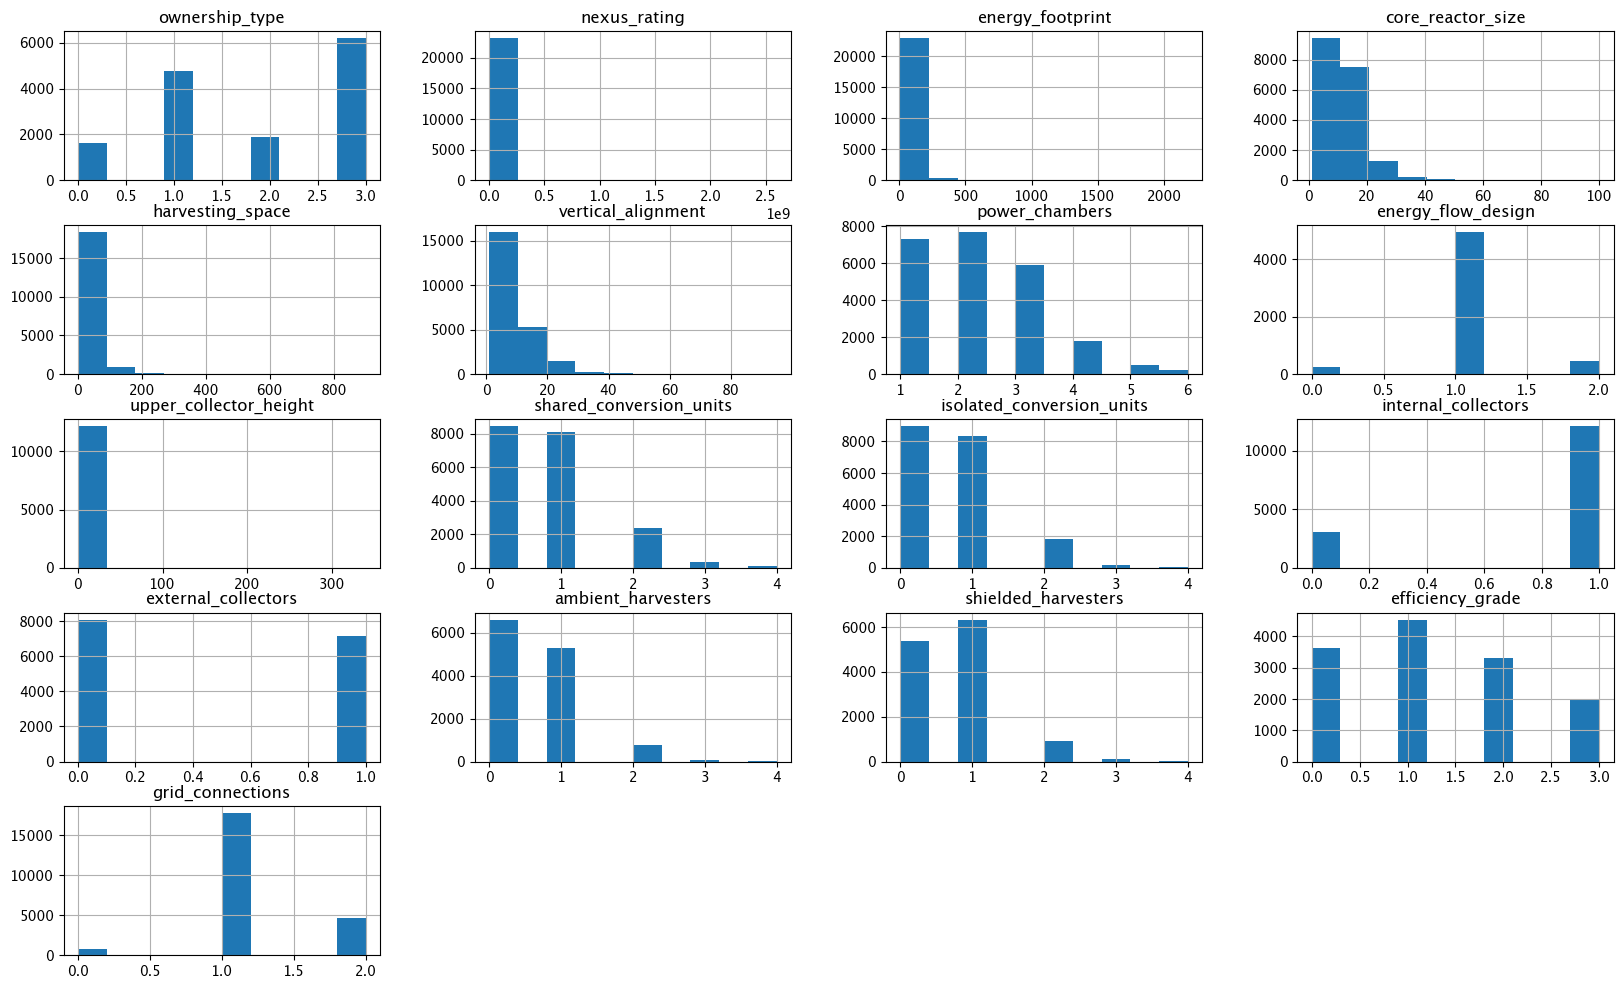

In [31]:
train.hist(figsize=(20, 12))

plt.show

In [32]:
categorical_features = ['ownership_type']

for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [610]:
model = CatBoostRegressor(
    loss_function="RMSE",
    verbose=0,          
    random_state=42,
    cat_features=categorical_features
)

param_grid = {
    'depth': [8, 10, 12],
    'learning_rate': [0.01, 0.02, 0.03, 0.05],
    'iterations': [1000, 1250, 1400, 1650],
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_log_error',
    n_jobs=-1,
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best RMSLE score (CV):", -grid.best_score_)

/Users/afras/Documents/NTNU/H25/intro_til_ML/TDT4172/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'depth': 10, 'iterations': 1650, 'learning_rate': 0.05}
Best RMSLE score (CV): 0.016834251418468116


In [33]:
model = CatBoostRegressor(
    loss_function="RMSE",
    verbose=0,          
    random_state=13,
    iterations=1650,
    learning_rate=0.02,
    depth=10,
    cat_features=categorical_features
)

model.fit(X_train, y_train)

In [34]:
y_pred = np.expm1(model.predict(X_test))

score = rmsle(y_test, y_pred)

print(score)

0.2936793174187809


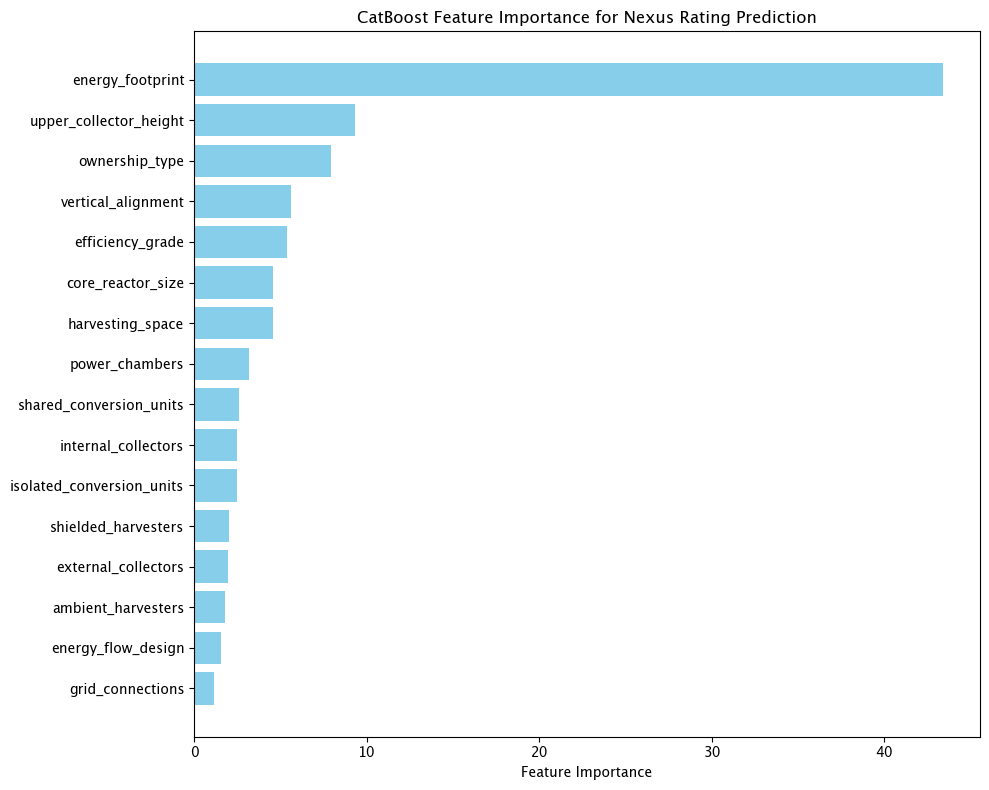

In [35]:
feature_names = X_train.columns
feature_importance = model.get_feature_importance()

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importance_df)), importance_df['importance'], color='skyblue')
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance for Nexus Rating Prediction')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Discussions for all tasks

## Task 1:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   The fitted curve shows a linear relationship with coefficients from gradient descent. Energy = w₁ × Network_Activity + w₀ where parameters are learned through minimizing MSE.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?
   
   Prediction errors appear normally distributed around -2-0. An unbiased estimator has expected value equal to the true parameter. Our linear regression with gradient descent is unbiased for the regression coefficients.

## Task 2:

   a. Explain poor initial performance and your improvements
   
   Initial performance was poor because the data has a non-linear circular pattern. I improved it by adding polynomial features (x₁², x₂², x₁×x₂) to capture the circular decision boundary.

   b. What is the model's inductive bias. Why is it important?
   
   The model's inductive bias is that the decision boundary is linear in the feature space. This is important because it determines what patterns the model can learn. linear boundaries in original space become complex boundaries with feature engineering.

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   Decision Tree achieved 94.6% accuracy, solving the problem better than logistic regression. It works because trees can create non-linear decision boundaries by splitting on individual features recursively.
   
   d. Plot the ROC curve
## Task 3:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?
   
   I used GridSearchCV to find optimal hyperparameters. This improved performance from default settings. I also tried over/under sampling, but it didn´t help. 

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   ROC AUC measures the model's ability to distinguish between classes regardless of threshold. It's appropriate for imbalanced data (19.3% positive class). ROC curve shows good performance with AUC=0.72.
   
   c. Try to solve the problem using sklearn's Random Forest Classifier. Compare the results.
   
   Random Forest achieved better performance than single Decision Tree due to ensemble learning. The multiple trees reduce overfitting and provide more robust predictions by averaging multiple decision boundaries.
## Final mission:

   a. Explain your threshold-breaking strategy
   
   I detected column shift between train/test sets and corrected it. Used CatBoostRegressor with optimal hyperparameters from GridSearchCV. Used CatBoost as it can handle mission values and categorical features automatically. I tried dropping isna(), but that was too many datapoints. Also tried using median/average where values were missing, but with bad results. 

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?
   
   RMSLE penalizes underestimation more than overestimation, appropriate for positive targets with wide ranges. I used RMSE loss function in CatBoost, then applied log transformation to target.

   c. Plot and interpret feature importances
   
   Feature importance analysis show which building characteristics most influence nexus rating. Here, its the Energy footprint. 

   d. Describe your ensembling techniques
   
   Used single CatBoost model rather than ensemble. CatBoost internally uses gradient boosting which is an ensemble technique.

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?
   
   Use cross-validation, hold-out validation set, monitor for data drift, implement model monitoring in production, and regularly retrain on new data.